# Parte 1 - Análise Exploratória: Diagnosticando Diabetes

Neste projeto, você imaginará que é um cientista de dados interessado em explorar dados que analisam como certos fatores de diagnóstico afetam o resultado do diabetes em pacientes mulheres.

Você usuará suas Análise Exploratória para inspecionar, limpar e validar os dados.

**Observação**: Este [conjunto de dados](https://www.kaggle.com/uciml/pima-indians-diabetes-database) contém as seguintes colunas:

- `Pregnancies`: Número de gravidezes
- `Glucose`: Concentração de glicose plasmática por 2 horas em um teste oral de tolerância à glicose
- `BloodPressure`: Pressão sanguínea diastólica
- `SkinThickness`: Espessura da dobra cutânea do tríceps
- `Insulin`: insulina sérica de 2 horas
- `BMI`: Índice de massa corporal
- `DiabetesPedigreeFunction`: Função hereditária do diabetes
- `Age`: Anos de idade)
- `Outcome`: variável de classe (0 ou 1)

## Inspeção Inicial

1. Primeiro, familiarize-se com o conjunto de dados [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database) . 
    
    Observe cada uma das nove colunas da documentação. 
    
    O que você espera que cada tipo de dados seja?

Tipo de dados esperado para cada coluna:

- `Pregnancies`: 
- `Glucose`:
- `BloodPressure`: 
- `SkinThickness`: 
- `Insulin`: 
- `BMI`:
- `DiabetesPedigreeFunction`: 
- `Age`: 
- `Outcome`: 

2. Em seguida, vamos carregar os dados de diabetes para começar a explorar.

    Carregue os dados em uma variável chamada `diabetes_data` e imprima as primeiras linhas.

    **Nota** : Os dados são armazenados em um arquivo chamado `diabetes.csv`.

In [3]:
import pandas as pd
import numpy as np

# ler os dados
diabete_data = pd.read_csv('diabetes.csv');

3. Quantas colunas (recursos) os dados contêm?

In [15]:
# imprime o número de colunas
num_colunas_diabete = diabete_data.shape[1]
print('Numeros de colunas : ' + str(num_colunas_diabete))

Numeros de colunas : 9


4. Quantas linhas (observações) os dados contêm?

In [16]:
# imprime o número de linhas
num_linhas_diabete = diabete_data.shape[0]
print('Numeros de Linhas : ' + str(num_linhas_diabete))

Numeros de Linhas : 768


## Inspeção Adicional

5. Vamos inspecionar mais o `diabetes_data`.

    Alguma das colunas nos dados contém valores nulos (ausentes)?

In [18]:
# descubra se as colunas contêm valores nulos
print(diabete_data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


6. Para investigar mais, calcule estatísticas resumidas sobre `diabetes_data` usando o método .describe().

In [19]:
# imprime estatísticas resumidas
print(diabete_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

7. Observando as estatísticas resumidas, você percebe algo estranho nas colunas a seguir?

- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

**Sua resposta para pergunta 7**: Aparentemente alguma continham valores zerados, com isso em mente, podemos notar que não é possivel ter um valor minimo de 0;

8. Vamos ver se podemos obter uma visão mais precisa dos valores ausentes nos dados.

In [24]:
# substitua instâncias de 0 por NaN
diabete_data.replace(0, np.nan, inplace = True)

9. Em seguida, verifique se há valores ausentes (nulos) em todas as colunas, assim como você fez na Etapa 5.

    Agora, quantos valores faltantes existem?

In [25]:
# descubra se as colunas contêm valores nulos após as substituições serem feitas
print(diabete_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   657.000000  763.000000     733.000000     541.000000  394.000000   
mean      4.494673  121.686763      72.405184      29.153420  155.548223   
std       3.217291   30.535641      12.382158      10.476982  118.775855   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.000000      64.000000      22.000000   76.250000   
50%       4.000000  117.000000      72.000000      29.000000  125.000000   
75%       7.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25%     27.500000        

10. Vamos dar uma olhada mais de perto nessas linhas para ter uma ideia melhor de por que alguns dados podem estar faltando.

    Mostre todas as linhas que contêm valores ausentes (nulos).

In [28]:
# mostre as linhas com valores ausentes
print(diabete_data.isnull().any())

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


11. Em seguida, dê uma olhada nos tipos de dados de cada coluna em `diabetes_data`.

    O resultado corresponde ao que você esperaria?

In [29]:
# mostre os tipos dos dados usando o método .info()
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 54.1+ KB


12. Para descobrir por que a `Outcome` coluna é do tipo `object`(string) em vez do tipo `int64`, imprima os valores exclusivos na `Outcome` coluna.

In [37]:
# imprime os valores únicos da coluna Outcome
diabete_data.Outcome.unique()


array(['1', '0', 'O'], dtype=object)

13. Como você pode resolver esse problema?


**Sua resposta à pergunta 13:** Converta os valores da matriz em inteiros ou substituir o valor que esta como letra 'o' para '0'.
Podendo utilizar algo parecido com isso:
res = diabete_data.Outcome.unique()
res = res.astype(int)

# Parte 2 - Análise Exploratória - Titanic

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = pd.read_csv('titanic.csv')

Um novo conjunto de dados nomeado `titanic`foi carregado. Esses dados contêm informações sobre os passageiros do Titanic, incluindo o valor que pagaram pela passagem e se sobreviveram ou não. Vamos investigar se existe uma associação entre a tarifa que um passageiro pagou (`Fare`) e se ele sobreviveu ou não (`Survived`, que é igual a `0` se o passageiro morreu e `1` se sobreviveu): 

In [41]:
#- Calcule a diferença na tarifa média paga pelos que sobreviveram e 
#  pelos que morreram. Qual grupo pagou uma tarifa média mais alta?
print(titanic)


     passenger_id  pclass                                               name  \
0            1216       3                                 Smyth, Miss. Julia   
1             699       3                                    Cacic, Mr. Luka   
2            1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3             449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4             576       2                                    Veal, Mr. James   
..            ...     ...                                                ...   
845           158       1                        Hipkins, Mr. William Edward   
846           174       1                            Kent, Mr. Edward Austin   
847           467       2                Kantor, Mrs. Sinai (Miriam Sternin)   
848          1112       3                          Peacock, Miss. Treasteall   
849           425       2                              Greenberg, Mr. Samuel   

        sex   age  sibsp  parch        

In [45]:
media_sobrevivente = titanic[titanic['survived'] == 1]['fare'].mean()
print(media_sobrevivente)

51.66002460063898


In [46]:
media_nao_sobrevivente = titanic[titanic['survived'] == 0]['fare'].mean()
print(media_nao_sobrevivente)

23.707454104477613


In [49]:
if media_sobrevivente == media_nao_sobrevivente:
    print('Ambos tiveram a mesma media')
elif media_sobrevivente >= media_nao_sobrevivente:
    print('os Sobreviventes tinha uma media maior de tarifa')
else:
    print('os NÂO Sobreviventes tinha uma media maior de tarifa')


os Sobreviventes tinha uma media maior de tarifa


In [50]:
# Calcule a diferença na tarifa mediana para aqueles que sobreviveram e aqueles que morreram.
mediana_sobrevivente = titanic[titanic['survived'] == 1]['fare'].median()
print(mediana_sobrevivente)

26.0


In [51]:
mediana_nao_sobrevivente = titanic[titanic['survived'] == 0]['fare'].median()
print(mediana_nao_sobrevivente)

10.5


In [52]:
diferenca = abs(mediana_sobrevivente - mediana_nao_sobrevivente)
print('diferença na tarifa mediana é de ' + str(diferenca))

diferenca : 15.5


Text(0, 0.5, 'Número de Passageiros')

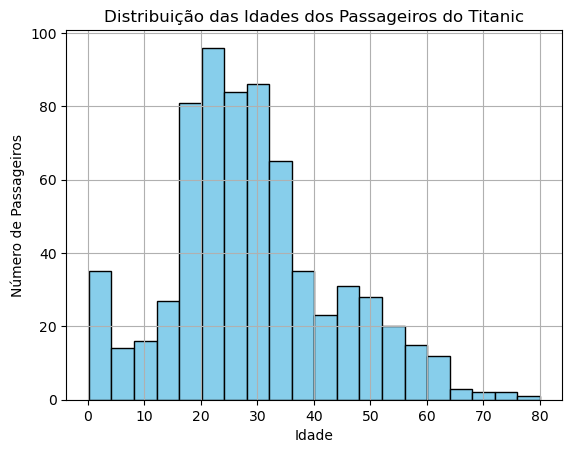

In [54]:
#- Crie um histograma da coluna idade para visualizar a distribuição das idades dos passageiros.

import matplotlib.pyplot as plt


titanic_sem_nulo = titanic.dropna(subset=['age'])

# Crie o histograma diretamente da coluna 'age'
# bins =  numero de intervalo
titanic_sem_nulo['age'].hist(bins=20, edgecolor='black', color='skyblue')

# Configure rótulos e títulos
plt.title('Distribuição das Idades dos Passageiros do Titanic')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')

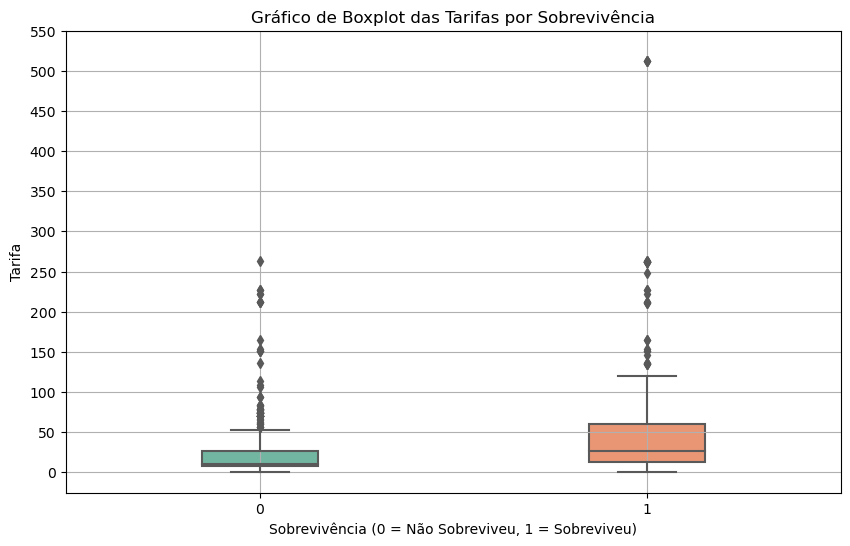

In [59]:
# Crie gráficos boxplot lado a lado de tarifas por sobrevivência. 
# Agora que você pode ver a disseminação dos dados, as diferenças média/mediana 
# parecem relativamente pequenas ou grandes?

titanic_tarifa_s_nulo = titanic.dropna(subset=['fare'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='fare', data=titanic_tarifa_s_nulo, width=0.3, palette='Set2')
plt.title('Gráfico de Boxplot das Tarifas por Sobrevivência')
plt.xlabel('Sobrevivência (0 = Não Sobreviveu, 1 = Sobreviveu)')
plt.ylabel('Tarifa')

# Calculando os limites mínimos e máximos das tarifas
limite_minimo = titanic_cleaned['fare'].min()
limite_maximo = titanic_cleaned['fare'].max()

# Criar uma lista de intervalos de 50/50 que abranja o intervalo de tarifas para melhor visualização
valores_eixo_y = np.arange(0, limite_maximo + 50, 50)

plt.yticks(valores_eixo_y)

plt.grid(True)
plt.show()
#Diferenças superior ao dobro

In [62]:
#- Calcule a matriz de correlação. Existe correlações entre as variáveis?


#matriz_correlacao = titanic.corr()

#por estar depreciado, a nova forma de uso
matriz_correlacao = titanic.corr(numeric_only=True)

print(matriz_correlacao)


              passenger_id    pclass       age     sibsp     parch      fare  \
passenger_id      1.000000  0.896525 -0.340788  0.098996 -0.000191 -0.480013   
pclass            0.896525  1.000000 -0.406071  0.074418 -0.006388 -0.560884   
age              -0.340788 -0.406071  1.000000 -0.251310 -0.159216  0.194609   
sibsp             0.098996  0.074418 -0.251310  1.000000  0.389236  0.141797   
parch            -0.000191 -0.006388 -0.159216  0.389236  1.000000  0.246414   
fare             -0.480013 -0.560884  0.194609  0.141797  0.246414  1.000000   
body             -0.027040 -0.089349  0.168140 -0.121234  0.131441 -0.084357   
survived         -0.305726 -0.329360 -0.042683 -0.044980  0.059172  0.251249   

                  body  survived  
passenger_id -0.027040 -0.305726  
pclass       -0.089349 -0.329360  
age           0.168140 -0.042683  
sibsp        -0.121234 -0.044980  
parch         0.131441  0.059172  
fare         -0.084357  0.251249  
body          1.000000       NaN  

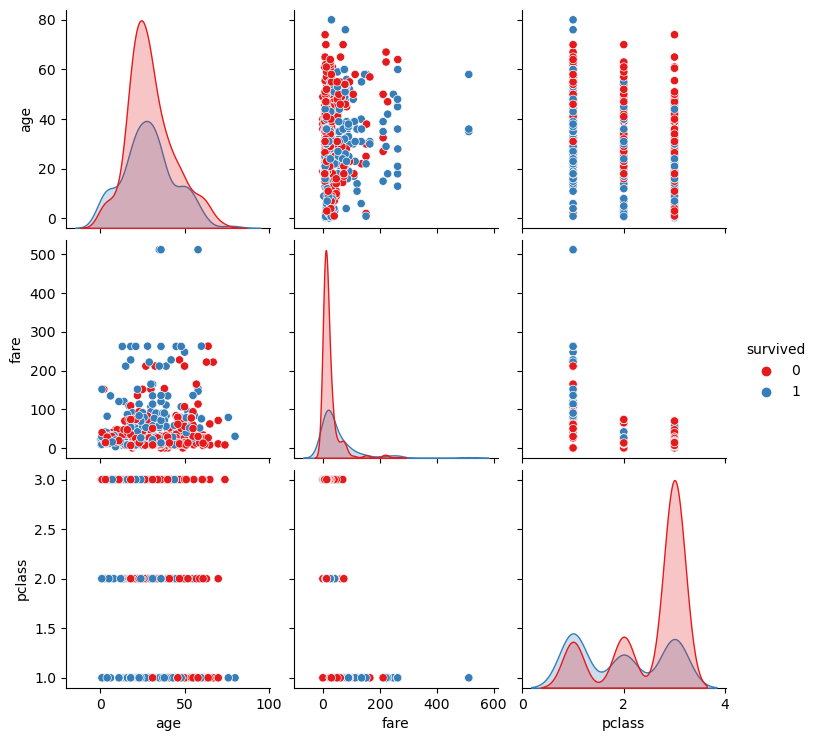

In [63]:
#- Crie gráficos de disperção para melhor visualizar a correlação entre variáveis

# - Use suas habilidades e apresente outras análises que ajudaram a entender melhor os dados 
import seaborn as sns

# Escolha das variáveis que deseja incluir no gráfico
variaveis = ['age', 'fare', 'pclass', 'survived']

# Criar o gráfico de dispersão em pares
sns.pairplot(titanic[variaveis], hue='survived', palette='Set1')
# Realizado a criação de graficos de dispersão, tendo em vista o seprador de sobrevivencia, levando em conta as demais colunas da base de dados
plt.show()

# Fim